In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
import math
import copy

In [2]:
"""
Read in train and test as Pandas DataFrames
"""
# df_train = pd.read_csv("train.csv")
# df_test = pd.read_csv("test.csv")

dftrain1 = pd.read_csv("train.csv")

dftest1 = pd.read_csv("test.csv")
dftrain1 = dftrain1.drop(['smiles'], axis=1)


In [7]:
dfgap = dftrain1['gap']
dftrain1 = dftrain1.drop(['gap'], axis = 1)
# dftest1 = dftest1.drop(['smiles'], axis = 1)
# dftest1 = dftest1.drop(['Id'], axis = 1)
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
dftrain1 = pd.DataFrame(sel.fit_transform(dftrain1))
# dftest1 = pd.DataFrame(sel.fit_transform(dftest1))
desired_features = sel.get_support(True)


In [14]:
newdesired_features=[]
for elem in list(desired_features+1):
    if elem<10:
        newElem="feat_00"+str(elem)
    elif elem<100:
        newElem="feat_0"+str(elem)
    else:
        newElem="feat_"+str(elem)
    newdesired_features.append(newElem)
    
newdesired_features

['feat_001',
 'feat_006',
 'feat_025',
 'feat_037',
 'feat_068',
 'feat_069',
 'feat_072',
 'feat_087',
 'feat_090',
 'feat_102',
 'feat_119',
 'feat_123',
 'feat_173',
 'feat_187',
 'feat_218',
 'feat_225',
 'feat_243',
 'feat_251']

In [15]:
dftrain1.columns=newdesired_features

In [16]:
dftrain1.head()

,feat_001,feat_006,feat_025,feat_037,feat_068,feat_069,feat_072,feat_087,feat_090,feat_102,feat_119,feat_123,feat_173,feat_187,feat_218,feat_225,feat_243,feat_251
0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,1,0,0,1
2,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0
3,1,1,1,0,1,0,0,1,1,1,0,1,1,0,1,0,1,0
4,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0


In [17]:
predesired_features=newdesired_features
# predesired_features.append('gap')

In [18]:
# dftrain1


In [19]:
# dftrain1['feat_251']
predesired_features

['feat_001',
 'feat_006',
 'feat_025',
 'feat_037',
 'feat_068',
 'feat_069',
 'feat_072',
 'feat_087',
 'feat_090',
 'feat_102',
 'feat_119',
 'feat_123',
 'feat_173',
 'feat_187',
 'feat_218',
 'feat_225',
 'feat_243',
 'feat_251']

In [11]:
# cols = dftrain1.columns
# colnames = []
# for i in xrange(0, len(cols)):
#     colnames.append('feat_' + str(i + 1).zfill(3))
# dftrain1.columns = colnames
# dftrain1=dftrain1[predesired_features]

In [20]:
# # simple model
# xvarssimple=list(dftrain1.columns)[0:len(list(dftrain1.columns))-1]
# formulasimple = str("gap ~ ") + str(xvarssimple[0])
# count = 0
# for xvar in xvarssimple:
#     if count > 0:
#         formulasimple = formulasimple + "+" + str(xvar)
#     count = count + 1

# print formulasimple

In [21]:
# simple model
# xvarssimple=list(dftrain1.columns)[0:len(list(dftrain1.columns))-1]
formulasimple = str("gap ~ ") + str(predesired_features[0])
count = 0
for xvar in predesired_features:
    if count > 0:
        formulasimple = formulasimple + "+" + str(xvar)
    count = count + 1

print formulasimple

gap ~ feat_001+feat_006+feat_025+feat_037+feat_068+feat_069+feat_072+feat_087+feat_090+feat_102+feat_119+feat_123+feat_173+feat_187+feat_218+feat_225+feat_243+feat_251


In [24]:
# remainingidsweek["0"]
dftrain1['gap'] = dfgap
dftrain1['id']=list(dftrain1.index)

In [26]:
dftrain1.head()

,feat_001,feat_006,feat_025,feat_037,feat_068,feat_069,feat_072,feat_087,feat_090,feat_102,feat_119,feat_123,feat_173,feat_187,feat_218,feat_225,feat_243,feat_251,gap,id
0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1.19,0
1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,1,0,0,1,1.60,1
2,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,1.49,2
3,1,1,1,0,1,0,0,1,1,1,0,1,1,0,1,0,1,0,1.36,3
4,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1.98,4


In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols
from sklearn.linear_model import LinearRegression
import patsy
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

In [28]:
def cv_optimize_ridge(X, y, n_folds=8):
    clf = Ridge()
    parameters = {"alpha":  [1e-2,1e-1 ,1.0,10,100]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

In [29]:
def cv_optimize_lasso(X, y, n_folds=8):
    clf = Lasso()
    parameters = {"alpha":  [1e-6,1e-5 ,1e-4, 1e-3, 1e-2]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

In [30]:
def cv_optimize_enet(X, y, n_folds=8):
    clf=ElasticNet()
    parameters = {"alpha":  [1e-6,1e-5 ,1e-4, 1e-3, 1e-2]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

In [31]:
predesired_featuresgap=copy.deepcopy(predesired_features)

In [32]:
predesired_featuresgap.append('gap')
predesired_featuresgap.append('id')

In [38]:
# remainingidsweek.head()
# 800000
# predesired_featuresgap.append('id')
lenTrain=1000

In [39]:
dftrain=dftrain1[predesired_featuresgap][:lenTrain]

In [44]:

######## Rerunning will overwrite reproducible results

# # sample by game ID number to avoid any indexing issues
# # store samples (like choosing a seed)



uniqueids = dftrain.id
traininglength = lenTrain*0.8
testinglength = lenTrain*0.1
validatelength = lenTrain*0.1

testids = np.random.choice(a = uniqueids, size = testinglength, replace = False)
remainingids = list([x for x in uniqueids if x not in testids])

trainidsdftrain = pd.DataFrame()
testidsdf = pd.DataFrame()
remainingidsdf = pd.DataFrame()
for i in range(5):
    trainidsdftrain[i] = np.random.choice(a = remainingids, size = traininglength, replace = False)
testidsdf[0] = testids
remainingidsdf[0] = remainingids

trainidsdftrain.to_csv("trainidsdftrain.csv")
testidsdf.to_csv("testidsdf.csv")
remainingidsdf.to_csv("remainingidsdf.csv")



In [48]:
def squarelist(list):
    return [ x**2 for x in list ]

def abslist(list):
    return [ abs(x) for x in list ]

def rootlist(list):
    return [ np.sqrt(x) for x in list ]

# sources: http://stackoverflow.com/questions/12555443/squaring-all-elements-in-a-list

In [49]:
%%time



# Stats for the Simple Model
olsmsessimple = []
olsmadssimple = []
ridgemsessimple = []
ridgemadssimple = []
lassomsessimple = []
lassomadssimple = []
enetmsessimple = []
enetmadssimple = []

# Stats for the Intuitive Model
olsmsesintuitive = []
olsmadsintuitive = []
ridgemsesintuitive = []
ridgemadsintuitive = []
lassomsesintuitive = []
lassomadsintuitive = []
enetmsesintuitive = []
enetmadsintuitive = []

# Stats for the Full Model
olsmsesall = []
olsmadsall = []
ridgemsesall = []
ridgemadsall = []
lassomsesall = []
lassomadsall = []
enetmsesall = []
enetmadsall = []

coeffsLinear=[]
coeffsRidge=[]
coeffsLasso=[]
coeffsEnet=[]


# Cross-Validate
for i in trainidsdftrain.columns.values:
    trainids = trainidsdftrain[i]
    validationids = set(remainingids) - set(trainids)
    
    traindf = dftrain.loc[dftrain["id"].isin(trainids)]
    validatedf = dftrain.loc[dftrain["id"].isin(validationids)]
    
    # make simple model x and y dataframes
    forfitsimple = pd.DataFrame(traindf.gap)
    forpredsimple = pd.DataFrame(validatedf.gap)
    for xvar in predesired_features:
        forpredsimple[xvar] = validatedf[xvar]
        forfitsimple[xvar] = traindf[xvar]
    ytrainsimple,xtrainsimple = patsy.dmatrices(formulasimple, data=forfitsimple)
    yvalidatesimple,xvalidatesimple = patsy.dmatrices(formulasimple, data=forpredsimple)


    
    
# Simple Models    

    # linear
    fit = ols(formulasimple, data = forfitsimple).fit()
    predsLinear = fit.predict(forpredsimple)
    prederrors = []
    count = 0
    for act in yvalidatesimple:
        prederrors.append(float(predsLinear[count] - float(act)))
        count = count + 1
    
    olsmsessimple.append(np.mean(squarelist(prederrors)))
    olsmadssimple.append(np.mean(abslist(prederrors))) 
    coeffsLinear.append(fit)
    
    # ridge
    fitridge = cv_optimize_ridge(xtrainsimple, ytrainsimple, n_folds=8)
    alpharidge = fitridge.best_params_['alpha']
    clfridge = Ridge(alpha=alpharidge).fit(xtrainsimple,ytrainsimple)
    predsRidge = clfridge.predict(xvalidatesimple)
    prederrors = []
    count = 0
    for act in yvalidatesimple:
        prederrors.append(float(predsRidge[count] - float(act)))
        count = count + 1
    ridgemsessimple.append(np.mean(squarelist(prederrors)))
    ridgemadssimple.append(np.mean(abslist(prederrors))) 
    coeffsRidge.append(clfridge)
    
    # lasso
    fitlasso = cv_optimize_lasso(xtrainsimple, ytrainsimple, n_folds=8)
    alphalasso = fitlasso.best_params_['alpha']
    clflasso = Lasso(alpha=alphalasso).fit(xtrainsimple,ytrainsimple)
    predsLasso = clflasso.predict(xvalidatesimple)
    prederrors = []
    count = 0
    for act in yvalidatesimple:
        prederrors.append(float(predsLasso[count] - float(act)))
        count = count + 1
    lassomsessimple.append(np.mean(squarelist(prederrors)))
    lassomadssimple.append(np.mean(abslist(prederrors)))  
    coeffsLasso.append(clflasso)
    
    # enet
    fitenet = cv_optimize_enet(xtrainsimple, forfitsimple["gap"], n_folds=8)
    alphaenet = fitenet.best_params_['alpha']
    clfenet = ElasticNet(alpha=alphaenet).fit(xtrainsimple,forfitsimple["gap"])
    predsEnet = clfenet.predict(xvalidatesimple)
    prederrors = []
    count = 0
    for act in yvalidatesimple:
        prederrors.append(float(predsEnet[count] - float(act)))
        count = count + 1
    enetmsessimple.append(np.mean(squarelist(prederrors)))
    enetmadssimple.append(np.mean(abslist(prederrors)))       
    coeffsEnet.append(clfenet)
    
    
    
    

CPU times: user 3.98 s, sys: 102 ms, total: 4.08 s
Wall time: 4.45 s


/Users/takehiro/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


***We ran the three sets of predictors on the following four models, to produce a total of 12 fit models.***

- **OLS Regression: this is the simplest, go-to model, and we expect it to perform worse than the others, which might filter out unnecessary data well.**


- **Ridge Regression: we used this because it ought to set the coefficients of less valuable predictors to near-zero values, which could produce excellent predictions given a large number of predictors.**


- **Lasso Regression: we used this because it ought to set the coefficients of less valuable predictors to zero values, which could produce excellent predictions given a large number of predictors.**


- **Elastic Net: we used this for similar reasons to the above.**

***Again, we trained and validated each of these on the following three predictor sets:***

- **Simple set**

- **Intuitive set**

- **All set**

***The model statements for these three predictors sets are printed above.***

In [106]:
predesired_features=copy.deepcopy(newdesired_features)

In [107]:
forpredsimpleAll = pd.DataFrame(dftrain.gap)
for xvar in predesired_features:
    forpredsimpleAll[xvar] = dftrain[xvar]
ytestsimple,xtestsimple = patsy.dmatrices(formulasimple, data=forpredsimpleAll)


# Linear
minIndex=olsmsessimple.index(min(olsmsessimple))
fit=coeffsLinear[minIndex]
predsLinearAll = fit.predict(forpredsimpleAll)


# Ridge
minIndex=ridgemsessimple.index(min(ridgemsessimple))
clfRidge=coeffsRidge[minIndex]
predsRidgeAll = clfRidge.predict(xtestsimple)

# Lasso
minIndex=lassomsessimple.index(min(lassomsessimple))
clflasso=coeffsLasso[minIndex]
predsLassoAll = clflasso.predict(xtestsimple)

# Enet
minIndex=enetmsessimple.index(min(enetmsessimple))
clfEnet=coeffsEnet[minIndex]
predsEnetAll = clfEnet.predict(xtestsimple)



In [111]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from bs4 import BeautifulSoup
import requests

In [112]:
# Simple = [round(np.mean(olsmadssimpleweek),2), round(np.mean(ridgemadssimpleweek),2), 
# round(np.mean(lassomadssimpleweek),2), round(np.mean(enetmadssimpleweek),2)]
# Intuitive = [round(np.mean(olsmadsintuitiveweek),2), round(np.mean(ridgemadsintuitiveweek),2), 
# round(np.mean(lassomadsintuitiveweek),2), round(np.mean(enetmadsintuitiveweek),2)]
All = [round(np.mean(olsmsessimple),5), round(np.mean(ridgemsessimple),5), round(np.mean(lassomsessimple),5), round(np.mean(enetmsessimple),5)]

MSEResultstableweek = pd.DataFrame()
# MSEResultstableweek["Simple"] = Simple
# MSEResultstableweek["Intuitive"] = Intuitive
MSEResultstableweek["All"] = All
MSEResultstableweek.index = ["OLS","Ridge","Lasso", "ElasticNet"]
print "Cross Validation Root Avg. MSE Next Week's Price:"
MSEResultstableweek

Cross Validation Root Avg. MSE Next Week's Price:


,All
OLS,0.09991
Ridge,0.09885
Lasso,0.09906
ElasticNet,0.09937


RMSE Results for Different Models of Next Week's Price:


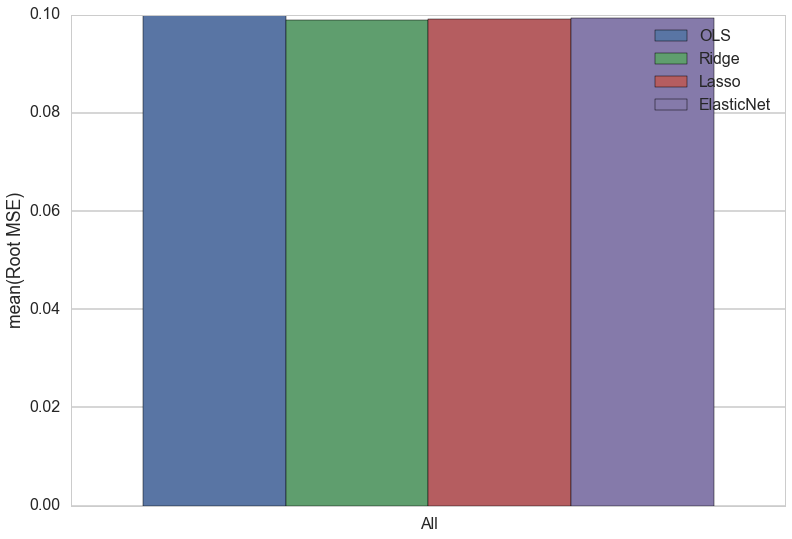

In [113]:
MSE = All
forplottableweek = pd.DataFrame()
forplottableweek["Root MSE"] = MSE
indices = [list(MSEResultstableweek.index)]
forplottableweek.index = indices
digits =  ["All","All","All", "All"]
forplottableweek["Digits"] = digits
print "RMSE Results for Different Models of Next Week's Price:"
sns.barplot(y = "Root MSE",x = digits, hue = forplottableweek.index.values, data = forplottableweek)

In [114]:
# dftrain.to_csv("train1.csv")

In [115]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [122]:
dftest1['gap']=0
predesired_features.append('gap')

In [123]:
# newdesired_features.remove('gap')
dftest2 = dftest1[predesired_features]

In [124]:
predsRidgeAll=predsRidgeAll.ravel()

In [125]:
errEnet=math.sqrt(sum((predsEnetAll-dftrain['gap'])**2)/lenTrain)
errLasso=math.sqrt(sum((predsLassoAll-dftrain['gap'])**2)/lenTrain)
errRidge=math.sqrt(sum((predsRidgeAll-dftrain['gap'])**2)/lenTrain)
errLinear=math.sqrt(sum((predsLinearAll-dftrain['gap'])**2)/lenTrain)

In [126]:
forpredsimpleAll = pd.DataFrame(dftest2.gap)
for xvar in predesired_features:
    forpredsimpleAll[xvar] = dftrain[xvar]
ytestsimple,xtestsimple = patsy.dmatrices(formulasimple, data=forpredsimpleAll)



In [127]:
error=[errLinear,errLasso,errRidge,errEnet]

bestmodel=[fit,clflasso,clfRidge,clfEnet][error.index(min(error))]
if error.index(min(error))==0:
    predsBestModel = bestmodel.predict(dftest2)
elif error.index(min(error))==2:
    predsBestModel = bestmodel.predict(xtestsimple)
    predsBestModel=predsBestModel.ravel()
else:
    predsBestModel = bestmodel.predict(xtestsimple)

In [129]:
# error=[newdftrain['errLinear'].mean(),newdftrain['errLasso'].mean(),newdftrain['errRidge'].mean(),newdftrain['errEnet'].mean()]
predsBestModel

array([ 1.7429361 ,  1.59786198,  1.66510141,  1.73375643,  2.00090825,
        2.00731003,  2.40682141,  1.72420758,  2.14364576,  1.85998459,
        1.77021043,  2.00090825,  2.3207271 ,  1.99905041,  1.60139688,
        2.29712445,  2.0391523 ,  2.13326644,  2.15710887,  1.63006128,
        1.72999516,  1.7429361 ,  2.04269479,  2.21358449,  1.74038175,
        1.77800229,  2.09544673,  1.60780002,  1.80560598,  1.87248277,
        1.77800229,  2.32472814,  1.67821516,  2.25334271,  1.75759886,
        2.15710887,  1.63546412,  1.60780002,  2.43134048,  1.70707256,
        2.25334271,  1.74260673,  2.15710887,  1.96504471,  1.72420758,
        2.17124945,  2.0391523 ,  1.74647859,  2.15710887,  2.25334271,
        2.25334271,  2.14884926,  1.75759886,  1.7429361 ,  1.31829443,
        2.2010863 ,  2.14884926,  1.59313726,  2.14884926,  1.57440874,
        1.57626658,  1.62026217,  1.54969918,  1.98217973,  2.14884926,
        2.15710887,  2.18471257,  2.41252668,  1.7429361 ,  2.40

In [105]:
# We need to submit best1.csv
write_to_file("best1.csv", predsBestModel)